# Introduction to regression with Neural network

In [1]:
#  Import libraies 
import tensorflow as tf 
import tensorflow.keras #type: ignore
# from tensorflow.keras.utlis import plot_model
print(tf.__version__)

import numpy as np 
import matplotlib.pyplot as plt 

2.10.0


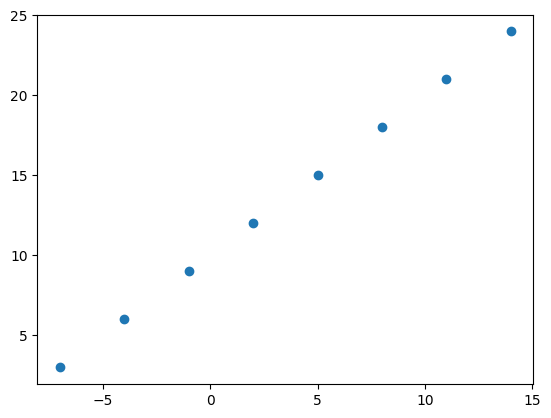

In [2]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)


In [3]:
y ==  X+10 

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shape 

In [4]:
# create a demo tensor for our houseing price prediction problem 

house_info = tf.constant(['bedroom','bathroom','garage'])
house_price =tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X.shape
output_shape = y.shape

input_shape,output_shape

((8,), (8,))

In [6]:
X[0],y[0]

(-7.0, 3.0)

In [7]:
# turn our numpy arrays into tensors 

X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape,output_shape

(TensorShape([]), TensorShape([]))

# Steps in modelling with Tensorflow

1. **Creating a model** -> Define the inout and output as well as the hidden layers of deep learning model
2. **Compiling a model** -> define the loss function and the optimizer and evaluation metrics 
3. **fitting a model** -> lketting the model try to find patterns between X & y 

In [9]:
tf.random.set_seed(42)
#  1. create a model 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#  2. complie the model 

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )
# 3. fit the model 

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) 

Epoch 1/5
1/1 [==============================] - 0s 256ms/step - loss: 20.7762 - mae: 20.7762
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 20.4201 - mae: 20.4201
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 20.1389 - mae: 20.1389
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 19.8576 - mae: 19.8576
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 19.5764 - mae: 19.5764


In [10]:
# check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# try and make prediction using our model 

y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 63ms/step


array([[-21.243689]], dtype=float32)

In [12]:
y_pred + 14

array([[-7.2436886]], dtype=float32)

# Improving the model

In [13]:
tf.random.set_seed(42)
#  1. create a model 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#  2. complie the model 

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )
# 3. fit the model 

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 161ms/step - loss: 11.6798 - mae: 11.6798
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.5473 - mae: 11.5473
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.4148 - mae: 11.4148
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2823 - mae: 11.2823
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1498 - mae: 11.1498
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0173 - mae: 11.0173
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8848 - mae: 10.8848
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7523 - mae: 10.7523
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6198 - mae: 10.6198
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4873 - mae: 10.4873
Epoch 11/100
1/1 [==============================] - 0s 4m

In [14]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 43ms/step


array([[29.906195]], dtype=float32)

In [16]:
tf.random.set_seed(42)
#  1. create a model 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
#  2. complie the model 

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['mae']
              )
# 3. fit the model 

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 277ms/step - loss: 12.6706 - mae: 12.6706
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 8.7431 - mae: 8.7431
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 4.1819 - mae: 4.1819
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 7.2236 - mae: 7.2236
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 6.2156 - mae: 6.2156
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 4.2301 - mae: 4.2301
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 4.9379 - mae: 4.9379
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 5.4457 - mae: 5.4457
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 4.5512 - mae: 4.5512
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6254 - mae: 3.6254
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 3.9

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 51ms/step


array([[27.305185]], dtype=float32)

In [18]:
model.predict([14.0])

1/1 [==============================] - 0s 27ms/step


array([[24.057102]], dtype=float32)

# Evaluating a model 

Build  a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model 

> "Visualize , Visualize, Visualize"
it is a good idea to visualize:

* The data  - what data are we working with ? what does it look like?
* The model itself - what does our model look like ?
* The training of a model  - how does a modelperform while it learns 
* the predictions of the model - how do the predictions of a model line up against the ground truth (original data) ?

 

In [19]:
# make bigger data 
X = tf.range(-100 ,100 ,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [20]:
# make labels for the dataset 

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

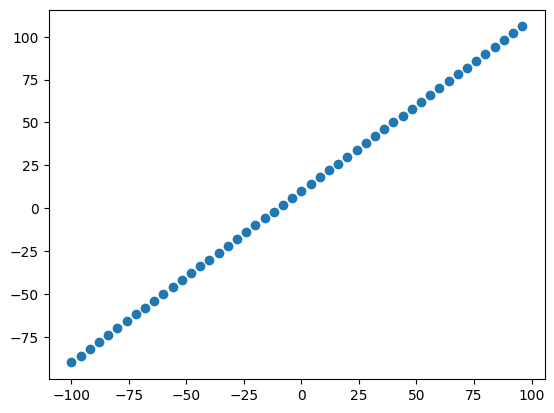

In [21]:
plt.scatter(X,y)

### The Three sets ......

* *Training set* - the model learns from this data , which is typically 70-80 % of the total data you have available.
* *Validation set* - the model get tuned on this data 10-15 %  of data set
* *test set* - the model gets evaluated on this data to test , this set is typically 10-15% of total dataset 

In [22]:
#  length of how many sample  we have 

len(X)

50

In [23]:
X_train  = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [24]:
len(X_train) , len(X_test)

(40, 10)

In [25]:
len(y_train) , len(y_test)

(40, 10)

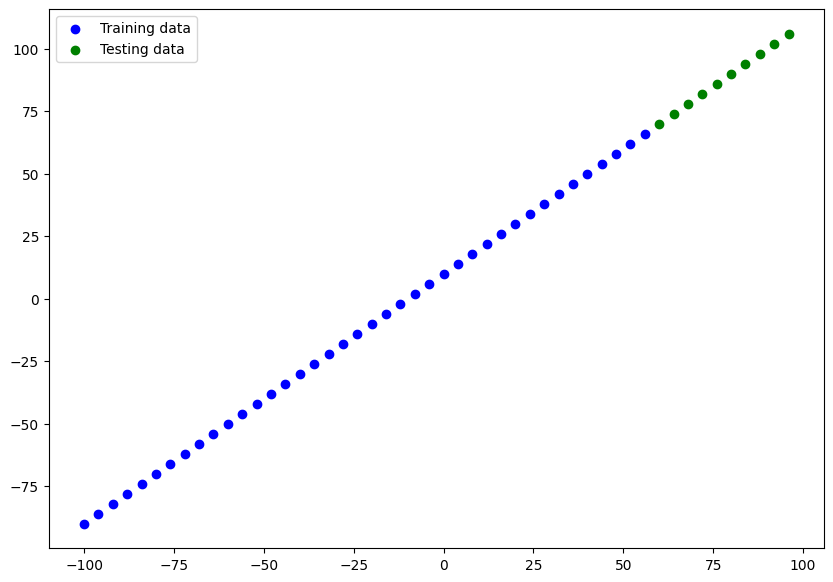

In [26]:
plt.figure(figsize=(10,7))

plt.scatter(X_train ,y_train , c = 'b',label ='Training data')

plt.scatter(X_test ,y_test , c = 'g',label ='Testing data')

plt.legend()

In [27]:
# 1. create a model 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10)
    
    
])

# compile the model 

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )

# fit the model 

# model.fit(X_train,y_train,epochs=100)

In [28]:
# model.summary()

In [29]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1],name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
],name = 'model_1')

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=  ['mae']
              )

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params -> total number of parameters in the model 
* Trainable parameters -> these are the parameters the model can update as it trains 
* non-trainable params -> these parameters arent updated during training 

In [31]:
model.fit(X_train,y_train , epochs=100 , verbose=1) #type:ignore

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 59.1835 - mae: 59.1835
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 17.6147 - mae: 17.6147
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 18.0695 - mae: 18.0695
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 13.2615 - mae: 13.2615
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.6399 - mae: 14.6399
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.6700 - mae: 11.6700
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 12.7354 - mae: 12.7354
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0610 - mae: 11.0610
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 39.9909 - mae: 39.9909
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 27.4455 - mae: 27.4455
Epoch 11/100
2/2 [==============================] - 0s 3ms/

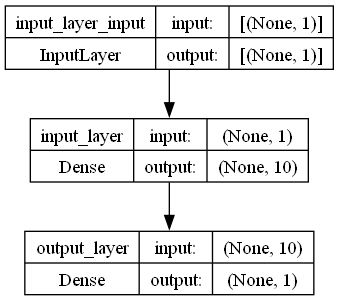

In [32]:

tf.keras.utils.plot_model(model=model, show_shapes=True) # type: ignore

### Visualization our model's prediction 

To visualize predictions , its a good idea to plot them against the ground truth labels.

Often you will see this in the form of 'y_test' or y_true 
versus 'y_pred' 

In [33]:
# making some predictions 

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 32ms/step


array([[ 77.01668 ],
       [ 82.03812 ],
       [ 87.059555],
       [ 92.08099 ],
       [ 97.10243 ],
       [102.123856],
       [107.14531 ],
       [112.16674 ],
       [117.18817 ],
       [122.20962 ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [35]:
#  Let's create a plotting function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels =y_test,
                     predictions =y_pred):
    plt.figure(figsize=(10,7))
    
    # training data in blue  
    plt.scatter(train_data,train_labels,c='b',label='Training data') # type: ignore
    # testing data in green 
    plt.scatter(test_data,test_labels,c='g',label='Testing data')
    # predictions data in red 
    plt.scatter(test_data,predictions,c='r',label = 'Predictions')

    plt.legend()

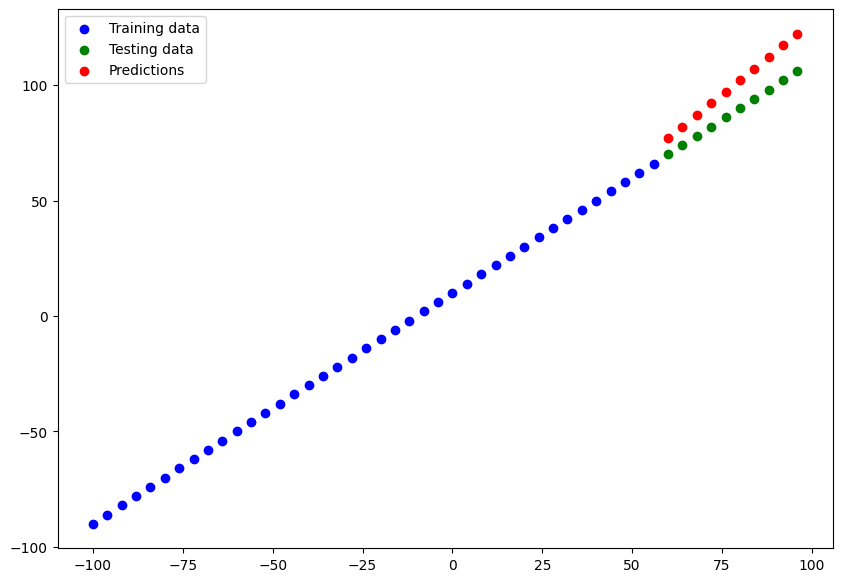

In [36]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics 

* MAE - mean absolute error , *on average , how wrong is each of models's predictions*
* MSE - mean square error , *square the average errors*

In [37]:
model.evaluate(X_test,y_test)


1/1 [==============================] - 0s 88ms/step - loss: 11.6131 - mae: 11.6131


[11.613146781921387, 11.613146781921387]

In [38]:
#  mean absolute error 

mae  = tf.metrics.mean_absolute_error(y_true = y_test,y_pred= tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.613147>

In [39]:
mse  = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=143.47269>

In [40]:
def mae(y_true ,y_pred):
    return tf.metrics.mean_absolute_error(y_true = y_test,y_pred= tf.squeeze(y_pred))

def mse(y_true ,y_pred):
    return tf.metrics.mean_squared_error(y_true = y_test,y_pred= tf.squeeze(y_pred))

### Experiments 

In [41]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

# model_1.fit(X_train,y_train, epochs=100)
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) 

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 27.6532 - mae: 27.6532
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0215 - mae: 9.0215
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 8.2267 - mae: 8.2267
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5477 - mae: 7.5477
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5590 - mae: 7.5590
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0449 - mae: 9.0449
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4571 - mae: 9.4571
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3164 - mae: 9.3164
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5136 - mae: 7.5136
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 12.5774 - mae: 12.5774
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 10.

1/1 [==============================] - 0s 32ms/step


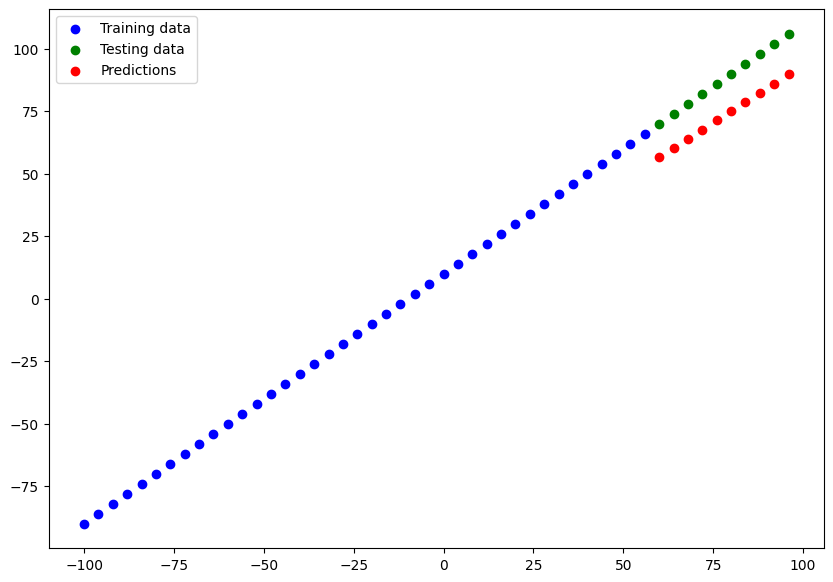

In [42]:
# make and plot predictions 

y_pred_1 = model_1.predict(X_test)

plot_predictions(predictions=y_pred_1)

In [43]:
# Calculate model_1 evaluation metrics

mae_1 = mae(y_test,(y_pred_1))
mse_1 = mse(y_test,(y_pred_1))

In [44]:
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.844645>,
 <tf.Tensor: shape=(), dtype=float32, numpy=221.1816>)

**Build model_2**

* 2 dense layers trained for 100 epochs 

In [45]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(metrics=['mse'],
                loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD()
                )

model_2.fit(tf.expand_dims(X_train,axis = -1),y_train,epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 37.7493 - mse: 1991.6493
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 29.5708 - mse: 1133.4918
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 33.5436 - mse: 1728.5039
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 13.4353 - mse: 259.9608
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 18.2219 - mse: 450.2631
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 8.0424 - mse: 91.0307
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 12.9335 - mse: 230.2961
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1951 - mse: 161.3282
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 41.2270 - mse: 2690.5420
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 28.5242 - mse: 1148.0171
Epoch 11/100
2/2 [============================

1/1 [==============================] - 0s 34ms/step


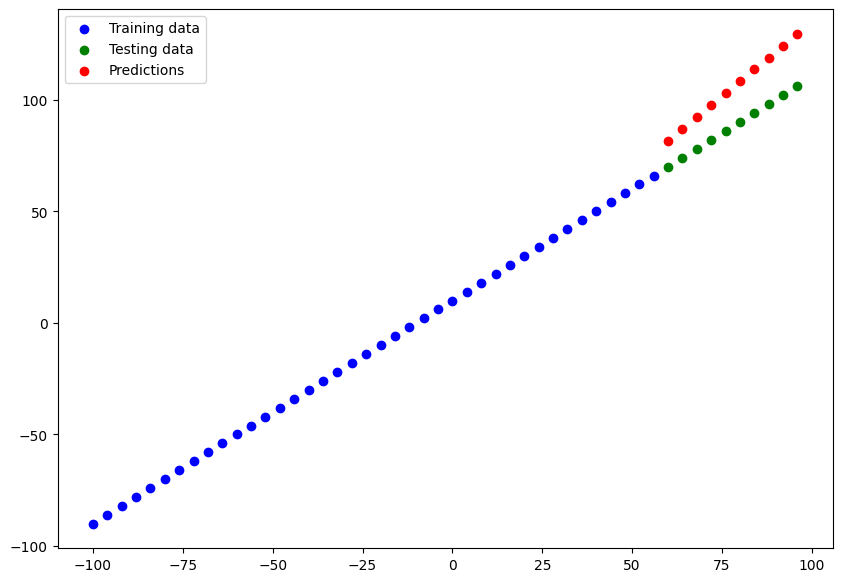

In [46]:

y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions=y_pred_2)

In [47]:
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test,y_pred_2)

In [48]:
mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=17.559278>,
 <tf.Tensor: shape=(), dtype=float32, numpy=322.80664>)

**Build mode_3**

In [49]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(metrics=['mae'],
                loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD()
                )

model_3.fit(tf.expand_dims(X_train,axis = -1),y_train,epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 70.8745 - mae: 70.8745
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 35.5393 - mae: 35.5393
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 37.4687 - mae: 37.4687
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 15.0038 - mae: 15.0038
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 21.8547 - mae: 21.8547
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 8.7009 - mae: 8.7009
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 12.7725 - mae: 12.7725
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1881 - mae: 11.1881
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 41.0084 - mae: 41.0084
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 28.3378 - mae: 28.3378
Epoch 11/500
2/2 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 32ms/step


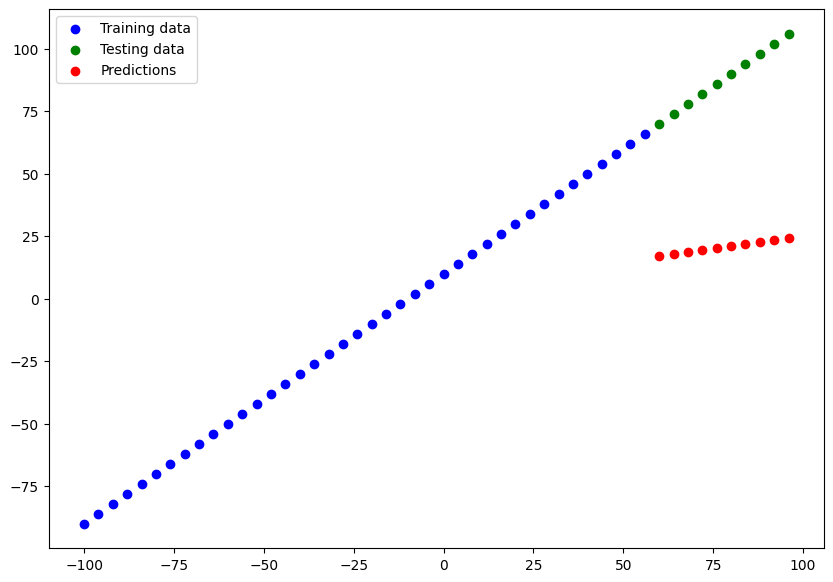

In [50]:
y_pred_3 = model_3.predict(X_test)

plot_predictions(predictions=y_pred_3)

In [51]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)

In [52]:
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.358574>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4620.1377>)

### Comparing the results of our experiments

We ran few experiment lets compare the results 

In [53]:
import pandas as pd 

model_results = [['model_1',mae_1.numpy(),mse_1.numpy()],
                 ['model_2',mae_2.numpy(),mse_2.numpy()],
                 ['model_3',mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,14.844645,221.181595
1,model_2,17.559278,322.806641
2,model_3,67.358574,4620.137695


Looks like model_2 performed the best 

## Tracking your experiment 

📖**Resource:** 
* TensorBoard  
* weights and Biases 

### Saving our models

There are 2 main formats to save our model 

* The  SavedModel format 
* The HDF5 format 


In [54]:
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [55]:
model_2.save('best_model_HDF5_format.h5')

## Loading the model back 

In [56]:
#  load in savedModel format 

loaded_SavedModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_SavedModel_format.summary() # type: ignore

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_2_preds = model_2.predict(X_test)

loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test) # type: ignore

model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [58]:
#  Loading in the model using .h5 format 

loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary() # type: ignore

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test) # type: ignore 
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])